# Tarea 5: Hill Climbing y Aprendizaje de Puntos de Referencia

**Equipo:** Iván Vázquez, Juan Daniel Rosales, Sandra Gómez 

## Objetivo

El objetivo de esta tarea es implementar y comparar los algoritmos de **Hill Climbing** y **Aprendizaje de Puntos de Referencia (Landmark Learning)** para que un robot pueda alcanzar la cima de una montaña en un plano bidimensional.

### Descripción del problema

1. **Entorno**: 
   - Un plano bidimensional que representa una montaña.
   - La cima está en una ubicación fija, representada por un árbol que emite un aroma atrayente cuya intensidad disminuye con la distancia.
   - Los bordes del plano (Norte, Sur, Este, Oeste) emiten señales repelentes.

2. **Robot**:
   - Comienza en una posición inicial aleatoria.
   - Puede moverse en direcciones discretas (arriba, abajo, izquierda, derecha).

3. **Señales**:
   - **Aroma atrayente del árbol**: Disminuye con la distancia.
   - **Señales repelentes de los bordes**: Aumentan con la cercanía.

### Algoritmos a implementar

1. **Hill Climbing**: El robot sigue una estrategia de gradiente ascendente para alcanzar la cima.
2. **Landmark Learning**: Entrenamiento de un modelo que permita al robot aprender a moverse hacia la cima considerando las señales atrayentes y repelentes.

### Comparación

Se evaluará la eficiencia y el comportamiento de ambos algoritmos mediante métricas y visualizaciones.


## Configuración del entorno

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

## Función para generar el entorno

In [17]:
def create_environment(grid_size=100):
    # Crear un plano 2D con la cima en el centro
    x = np.linspace(-10, 10, grid_size)
    y = np.linspace(-10, 10, grid_size)
    X, Y = np.meshgrid(x, y)
    
    # Función de altura (cima de la montaña en el centro)
    Z = np.exp(-0.1 * (X**2 + Y**2))  # Montaña con un pico
    
    # Añadir puntos cardinales con señales repelentes
    repel_N = -np.exp(-0.1 * (Y + 10)**2)  # Norte
    repel_S = -np.exp(-0.1 * (Y - 10)**2)  # Sur
    repel_E = -np.exp(-0.1 * (X - 10)**2)  # Este
    repel_W = -np.exp(-0.1 * (X + 10)**2)  # Oeste
    
    Z += repel_N + repel_S + repel_E + repel_W
    return X, Y, Z

## Generar una posición inicial aleatoria

In [19]:
def random_start(grid_size):
    # Generar coordenadas aleatorias dentro de los límites del plano
    return np.random.randint(0, grid_size, size=2)

## Algoritmo Hill Climbing

In [3]:
def hill_climbing(X, Y, Z, start, steps=200):
    position = np.array(start)
    path = [position]
    for _ in range(steps):
        neighbors = [
            position + [1, 0],  # Derecha
            position + [-1, 0], # Izquierda
            position + [0, 1],  # Arriba
            position + [0, -1], # Abajo
        ]
        neighbors = np.clip(neighbors, 0, len(Z) - 1)  # Limitar a los bordes
        
        # Elegir vecino con mayor altura
        heights = [Z[n[0], n[1]] for n in neighbors]
        best_neighbor = neighbors[np.argmax(heights)]
        if Z[best_neighbor[0], best_neighbor[1]] <= Z[position[0], position[1]]:
            break  # Terminar si no hay mejora
        position = best_neighbor
        path.append(position)
    return np.array(path)


## Algoritmo Aprendizaje de Puntos de Referencia

In [12]:
def landmark_learning(X, Y, Z, start, steps=200, lr=0.1):
    position = np.array(start)
    path = [position]
    weights = np.random.rand(2)  # Inicializar pesos aleatorios
    for _ in range(steps):
        # Gradiente descendente
        gradient = np.array([Z[position[0] + 1, position[1]] - Z[position[0] - 1, position[1]],
                             Z[position[0], position[1] + 1] - Z[position[0], position[1] - 1]])
        weights += lr * gradient
        weights /= np.linalg.norm(weights)  # Normalizar pesos
        
        # Calcular nueva posición
        step = np.clip(position + weights, 0, len(Z) - 1)
        position = step.astype(int)
        path.append(position)
    return np.array(path), weights

## Visualización de resultados

In [11]:
def plot_results(X, Y, Z, hill_path, landmark_path):
    fig, ax = plt.subplots(figsize=(10, 8))
    ax.contourf(X, Y, Z, cmap='terrain', levels=100, alpha=0.8)
    ax.plot(hill_path[:, 0], hill_path[:, 1], color='blue', label='Hill Climbing', lw=2)
    ax.plot(landmark_path[:, 0], landmark_path[:, 1], color='green', label='Landmark Learning', lw=2)
    ax.scatter(hill_path[0, 0], hill_path[0, 1], color='red', label='Start (Hill Climbing)', zorder=5)
    ax.scatter(landmark_path[0, 0], landmark_path[0, 1], color='yellow', label='Start (Landmark Learning)', zorder=5)
    plt.legend()
    plt.title("Resultados")
    plt.show()


## Diagrama de Hinton para los pesos de Landmark Learning

In [15]:
def plot_hinton(weights):
    fig, ax = plt.subplots(figsize=(5, 5))
    max_weight = np.abs(weights).max()
    ax.set_aspect('equal')
    ax.grid(False)
    ax.set_xticks([])
    ax.set_yticks([])
    for i in range(len(weights)):
        color = 'black' if weights[i] > 0 else 'white'
        size = np.sqrt(np.abs(weights[i]) / max_weight)
        rect = plt.Rectangle([i - size / 2, 0 - size / 2], size, size, color=color)
        ax.add_patch(rect)
    plt.title("Diagrama de Hinton")
    plt.show()


## Ejecución del código

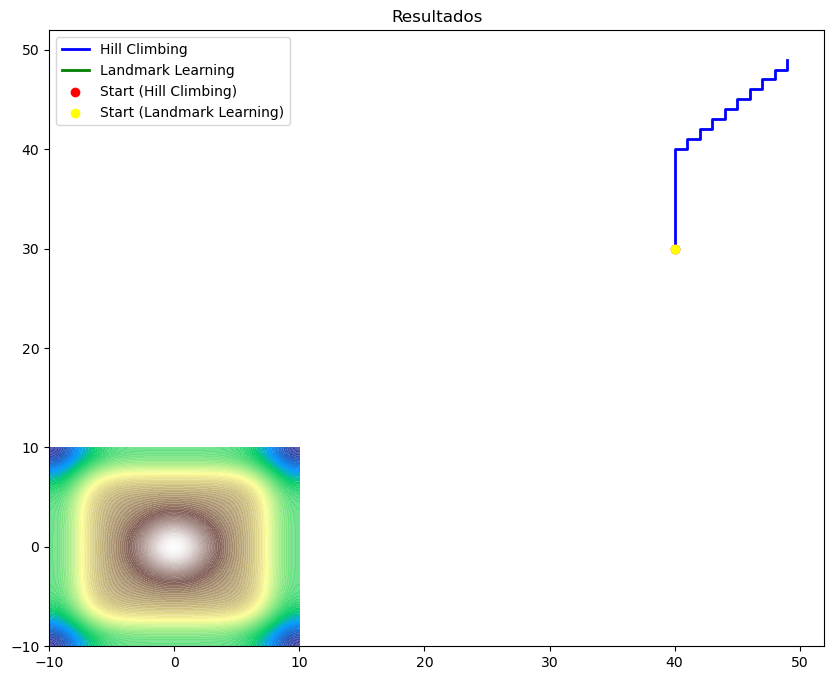

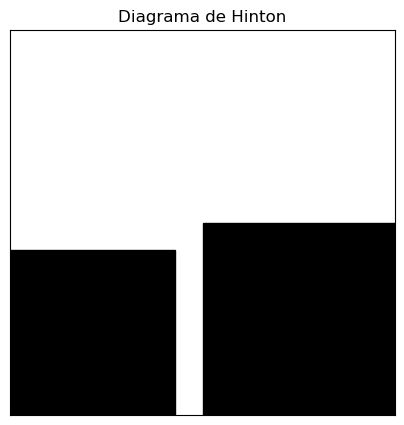

In [20]:
# Crear entorno
grid_size = 100
X, Y, Z = create_environment(grid_size)

# Posición inicial aleatoria
start = random_start(grid_size)

# Ejecutar Hill Climbing
hill_path = hill_climbing(X, Y, Z, start)

# Ejecutar Landmark Learning
landmark_path, weights = landmark_learning(X, Y, Z, start)

# Graficar resultados
plot_results(X, Y, Z, hill_path, landmark_path)

# Graficar pesos de Landmark Learning
plot_hinton(weights)
